<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-11-23 15:41:50.747025


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

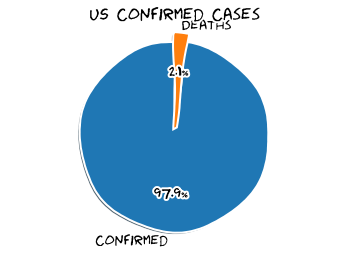

US Population
330362592
US Confirmed
12254135 (3.709298600006141% of population)
US Deaths
256358

New York City Confirmed
294765 (3.5357019351630243% of population)
New York City Deaths
24189

Philippines Confirmed
420614
Philippines Deaths
8173



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

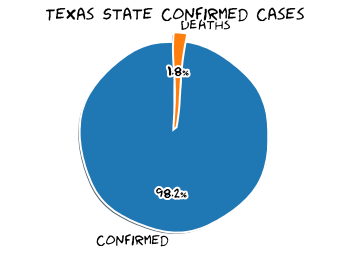

Texas State Total Population
28701845
Texas State Confirmed
1153944 (4.0204523437430595% of population)
Texas State Deaths
21013 (1.8209722482200177% of confirmed)



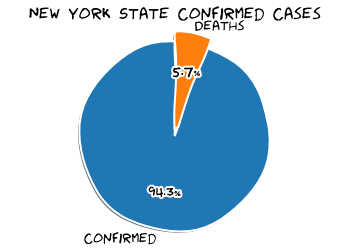

New York State Total Population
19542209
New York State Confirmed
598118 (3.0606468286159463% of population)
New York State Deaths
34203 (5.718436830190699% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1606141565000,40.710881,-73.816847,85777,0,7338,78439,Queens,36081,"Queens, New York, US",3805.785458,None,None,84036081,USA
10,New York,US,1606141565000,40.636182,-73.949356,84609,0,7481,77128,Kings,36047,"Kings, New York, US",3305.164297,None,None,84036047,USA
20,New York,US,1606141565000,40.852093,-73.862828,60979,0,5033,55946,Bronx,36005,"Bronx, New York, US",4299.724934,None,None,84036005,USA
24,New York,US,1606141565000,40.740665,-73.589419,56706,0,2240,54466,Nassau,36059,"Nassau, New York, US",4179.010763,None,None,84036059,USA
25,New York,US,1606141565000,40.883201,-72.801217,56339,0,2032,54307,Suffolk,36103,"Suffolk, New York, US",3815.451838,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,New York,US,1606141565000,42.780810,-76.824971,243,0,5,238,Seneca,36099,"Seneca, New York, US",714.369708,None,None,84036099,USA
2735,New York,US,1606141565000,44.590409,-74.299260,231,0,5,226,Franklin,36033,"Franklin, New York, US",461.796809,None,None,84036033,USA
2743,New York,US,1606141565000,42.635055,-77.103699,228,0,7,221,Yates,36123,"Yates, New York, US",915.184843,None,None,84036123,USA
2885,New York,US,1606141565000,42.588317,-74.443390,169,0,2,167,Schoharie,36095,"Schoharie, New York, US",545.178877,None,None,84036095,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1606141565000,40.710881,-73.816847,85777,0,7338,78439,Queens,36081,"Queens, New York, US",3805.785458,None,None,84036081,USA
10,New York,US,1606141565000,40.636182,-73.949356,84609,0,7481,77128,Kings,36047,"Kings, New York, US",3305.164297,None,None,84036047,USA
20,New York,US,1606141565000,40.852093,-73.862828,60979,0,5033,55946,Bronx,36005,"Bronx, New York, US",4299.724934,None,None,84036005,USA
33,New York,US,1606141565000,40.767273,-73.971526,42354,0,3219,39135,New York,36061,"New York, New York, US",2600.469330,None,None,84036061,USA
115,New York,US,1606141565000,40.585822,-74.148086,21046,0,1118,19928,Richmond,36085,"Richmond, New York, US",4420.100684,None,None,84036085,USA


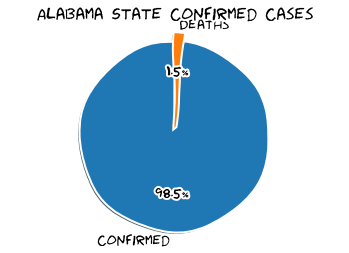

Alabama State Total Population
4887871
Alabama State Confirmed
234080 (4.788997090962507% of population)
Alabama State Deaths
3459 (1.4776999316473% of confirmed)



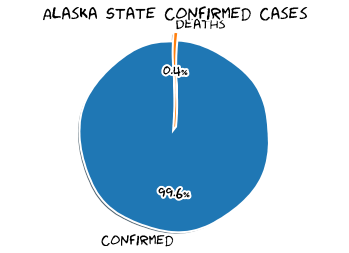

Alaska State Total Population
737438
Alaska State Confirmed
27773 (3.7661471201646783% of population)
Alaska State Deaths
103 (0.3708637885716343% of confirmed)



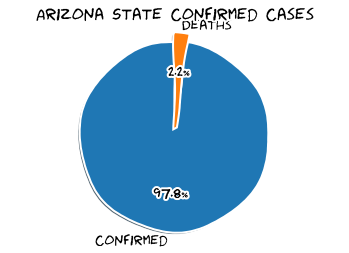

Arizona State Total Population
7171646
Arizona State Confirmed
297761 (4.151919935813899% of population)
Arizona State Deaths
6431 (2.159785868532145% of confirmed)



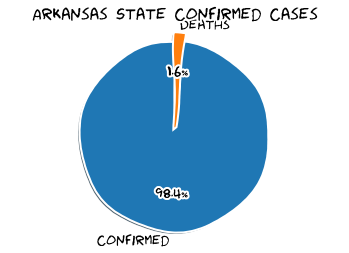

Arkansas State Total Population
3013825
Arkansas State Confirmed
145173 (4.816902109445638% of population)
Arkansas State Deaths
2357 (1.6235801423129648% of confirmed)



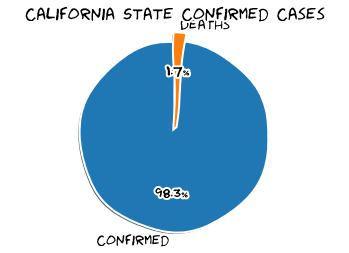

California State Total Population
39557045
California State Confirmed
1115252 (2.8193511421290443% of population)
California State Deaths
18727 (1.6791720615609746% of confirmed)



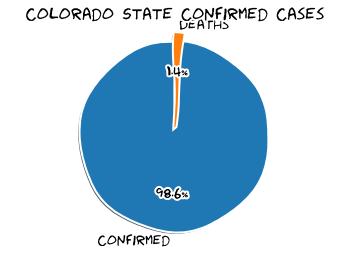

Colorado State Total Population
5695564
Colorado State Confirmed
198600 (3.48692420978853% of population)
Colorado State Deaths
2806 (1.4128902316213494% of confirmed)



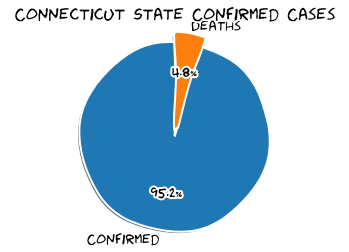

Connecticut State Total Population
3572665
Connecticut State Confirmed
101469 (2.8401487405060366% of population)
Connecticut State Deaths
4828 (4.758103460170101% of confirmed)



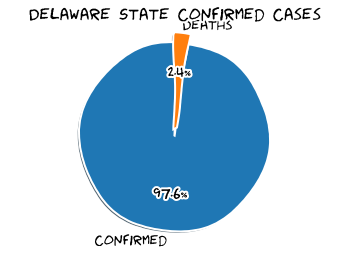

Delaware State Total Population
967171
Delaware State Confirmed
31808 (3.2887669295295248% of population)
Delaware State Deaths
748 (2.3516096579476864% of confirmed)



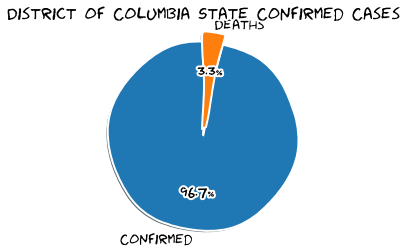

District of Columbia State Total Population
702455
District of Columbia State Confirmed
20151 (2.868653508053897% of population)
District of Columbia State Deaths
670 (3.3248970274428067% of confirmed)



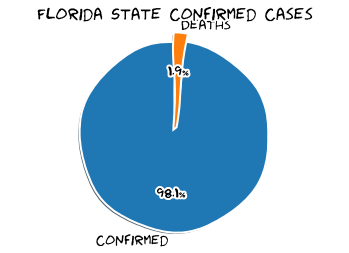

Florida State Total Population
21299325
Florida State Confirmed
938414 (4.405839152179706% of population)
Florida State Deaths
17991 (1.9171708861973498% of confirmed)



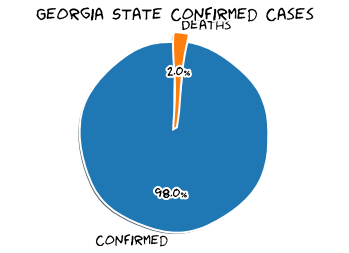

Georgia State Total Population
10519475
Georgia State Confirmed
449132 (4.269528659937878% of population)
Georgia State Deaths
9198 (2.0479502685179414% of confirmed)



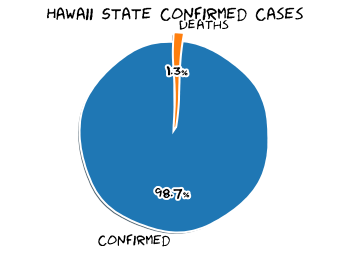

Hawaii State Total Population
1420491
Hawaii State Confirmed
17483 (1.2307716134773117% of population)
Hawaii State Deaths
233 (1.3327232168392151% of confirmed)



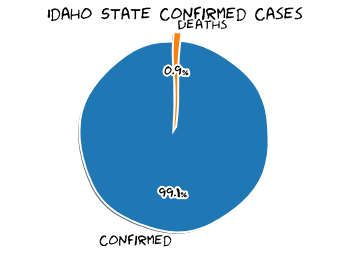

Idaho State Total Population
1754208
Idaho State Confirmed
91653 (5.224750998741312% of population)
Idaho State Deaths
849 (0.9263199240614054% of confirmed)



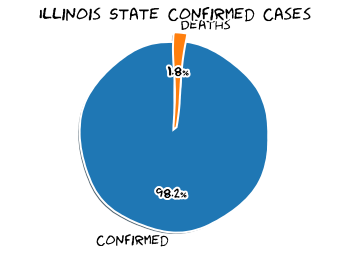

Illinois State Total Population
12741080
Illinois State Confirmed
656298 (5.151039001403335% of population)
Illinois State Deaths
12050 (1.836056181795465% of confirmed)



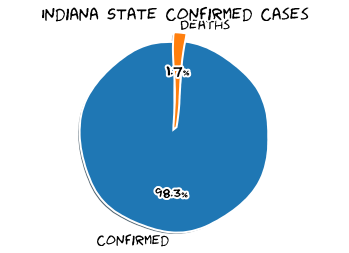

Indiana State Total Population
6691878
Indiana State Confirmed
295357 (4.413663847428181% of population)
Indiana State Deaths
5040 (1.7064095315160974% of confirmed)



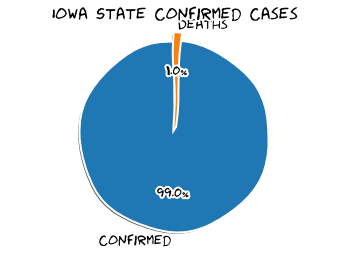

Iowa State Total Population
3156145
Iowa State Confirmed
211713 (6.707961769817293% of population)
Iowa State Deaths
2202 (1.0400872879794818% of confirmed)



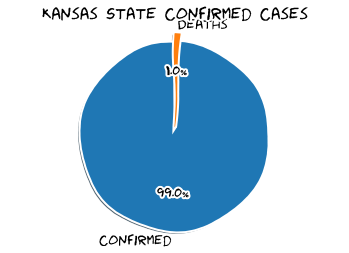

Kansas State Total Population
2911510
Kansas State Confirmed
137085 (4.7083815614578% of population)
Kansas State Deaths
1326 (0.9672830725462305% of confirmed)



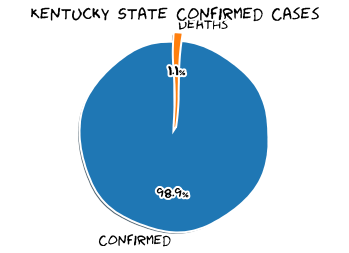

Kentucky State Total Population
4468402
Kentucky State Confirmed
158100 (3.5381776303922523% of population)
Kentucky State Deaths
1787 (1.1302972802024036% of confirmed)



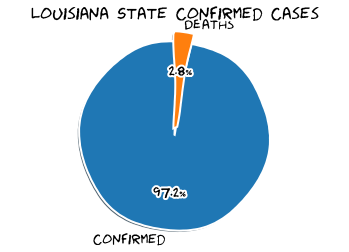

Louisiana State Total Population
4659978
Louisiana State Confirmed
220192 (4.72517252227371% of population)
Louisiana State Deaths
6260 (2.842973405028339% of confirmed)



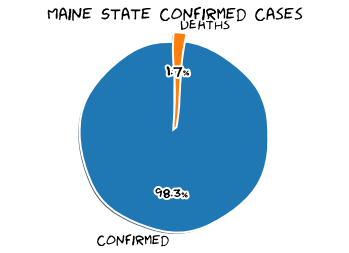

Maine State Total Population
1338404
Maine State Confirmed
10544 (0.7878039814585134% of population)
Maine State Deaths
177 (1.678679817905918% of confirmed)



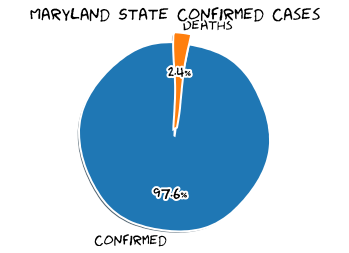

Maryland State Total Population
6042718
Maryland State Confirmed
182139 (3.014189972128436% of population)
Maryland State Deaths
4409 (2.420678712411949% of confirmed)



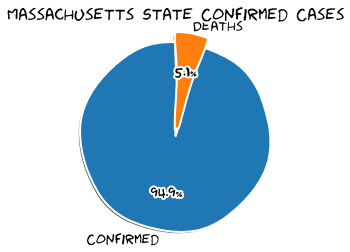

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
206850 (2.996892706894621% of population)
Massachusetts State Deaths
10512 (5.081943437273387% of confirmed)



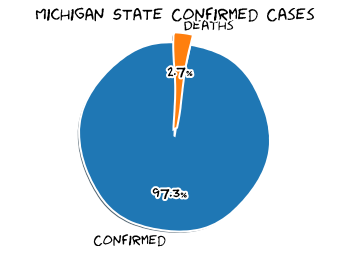

Michigan State Total Population
9995915
Michigan State Confirmed
329021 (3.2915546000541225% of population)
Michigan State Deaths
8875 (2.6973962148312722% of confirmed)



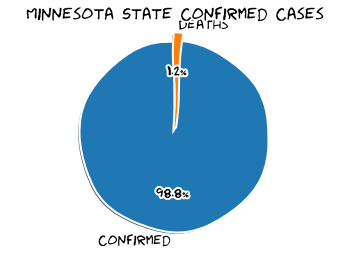

Minnesota State Total Population
5611179
Minnesota State Confirmed
270157 (4.814620955774179% of population)
Minnesota State Deaths
3297 (1.2204014702561843% of confirmed)



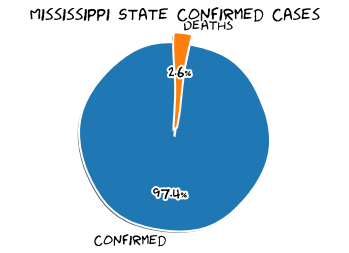

Mississippi State Total Population
2986530
Mississippi State Confirmed
143180 (4.794192591402062% of population)
Mississippi State Deaths
3676 (2.5673976812403967% of confirmed)



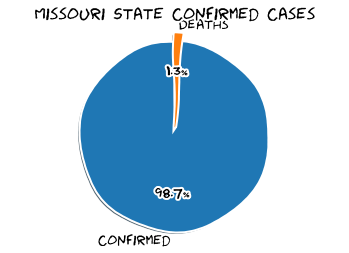

Missouri State Total Population
6126452
Missouri State Confirmed
279819 (4.567390718151387% of population)
Missouri State Deaths
3580 (1.2793984682955768% of confirmed)



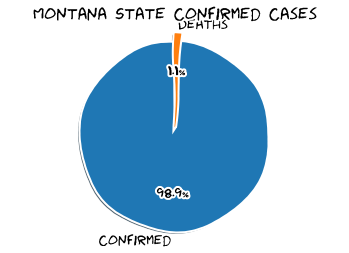

Montana State Total Population
1062305
Montana State Confirmed
55680 (5.2414325452671315% of population)
Montana State Deaths
603 (1.0829741379310345% of confirmed)



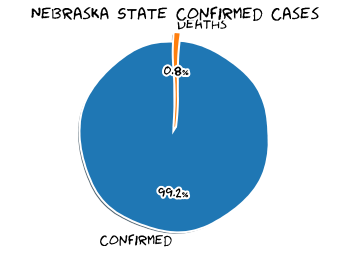

Nebraska State Total Population
1929268
Nebraska State Confirmed
114061 (5.912138697163898% of population)
Nebraska State Deaths
909 (0.7969419871822971% of confirmed)



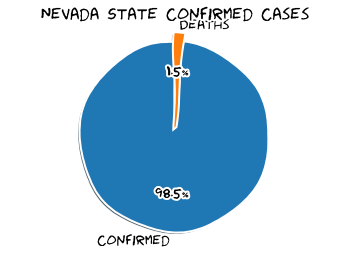

Nevada State Total Population
3034392
Nevada State Confirmed
133888 (4.412350151199977% of population)
Nevada State Deaths
2017 (1.5064830305927341% of confirmed)



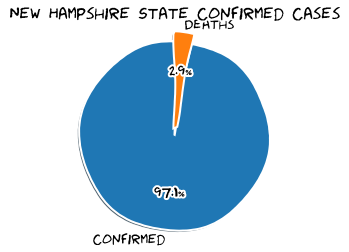

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
17637 (1.3002245554230207% of population)
New Hampshire State Deaths
512 (2.9029880365141465% of confirmed)



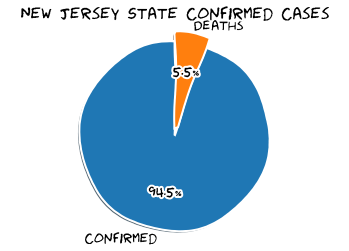

New Jersey State Total Population
8908520
New Jersey State Confirmed
306007 (3.4349925689115586% of population)
New Jersey State Deaths
16761 (5.47732568209224% of confirmed)



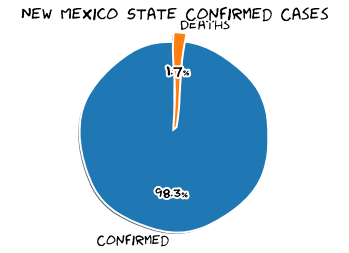

New Mexico State Total Population
2095428
New Mexico State Confirmed
81896 (3.9083184914967255% of population)
New Mexico State Deaths
1383 (1.6887271661619616% of confirmed)



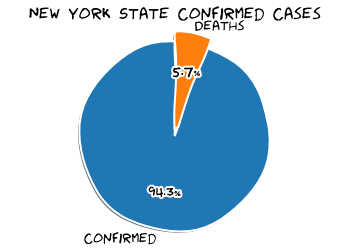

New York State Total Population
19542209
New York State Confirmed
598118 (3.0606468286159463% of population)
New York State Deaths
34203 (5.718436830190699% of confirmed)



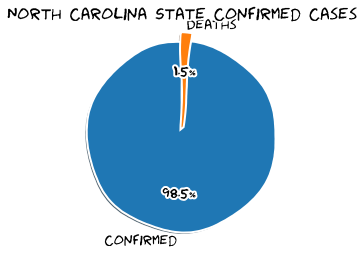

North Carolina State Total Population
10383620
North Carolina State Confirmed
336775 (3.2433293976474484% of population)
North Carolina State Deaths
5034 (1.4947665355207482% of confirmed)



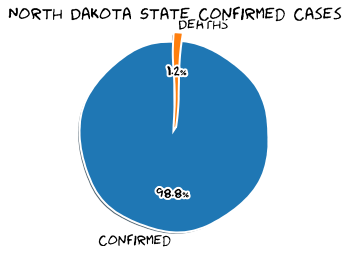

North Dakota State Total Population
760077
North Dakota State Confirmed
72683 (9.562583790852768% of population)
North Dakota State Deaths
840 (1.155703534526643% of confirmed)



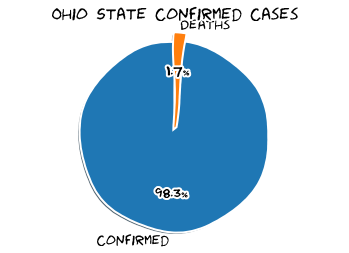

Ohio State Total Population
11689442
Ohio State Confirmed
351419 (3.006294055781277% of population)
Ohio State Deaths
5996 (1.7062253321533554% of confirmed)



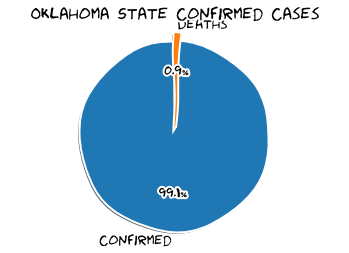

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
174330 (4.421164272894354% of population)
Oklahoma State Deaths
1634 (0.9373028164974474% of confirmed)



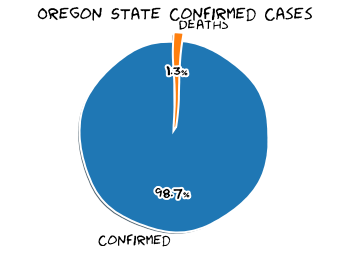

Oregon State Total Population
4190713
Oregon State Confirmed
65170 (1.5551053006970412% of population)
Oregon State Deaths
820 (1.258247659966242% of confirmed)



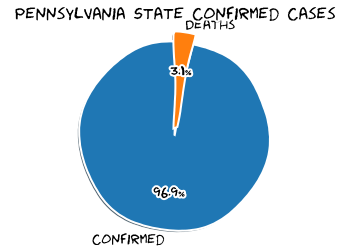

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
313358 (2.4467598340290433% of population)
Pennsylvania State Deaths
9816 (3.1325193548592987% of confirmed)



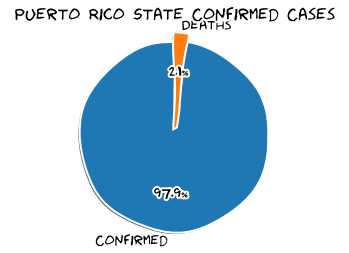

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
49170 (1.5388934426614311% of population)
Puerto Rico State Deaths
1032 (2.0988407565588774% of confirmed)



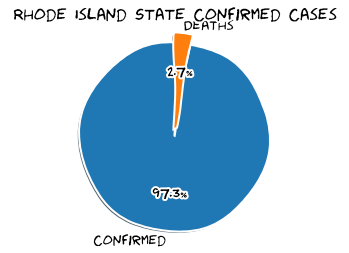

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
48001 (4.539895868307931% of population)
Rhode Island State Deaths
1294 (2.695777171308931% of confirmed)



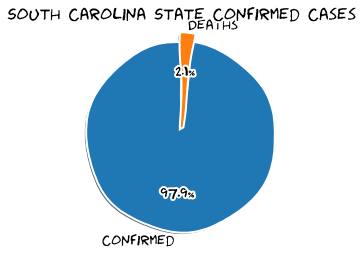

South Carolina State Total Population
5084127
South Carolina State Confirmed
206295 (4.0576287728453675% of population)
South Carolina State Deaths
4283 (2.07615308175186% of confirmed)



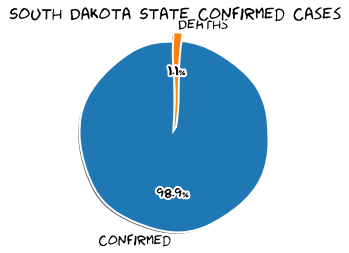

South Dakota State Total Population
882235
South Dakota State Confirmed
73065 (8.281807001535872% of population)
South Dakota State Deaths
819 (1.1209197290084172% of confirmed)



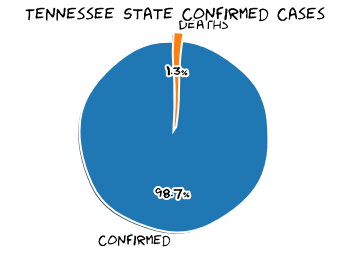

Tennessee State Total Population
6770010
Tennessee State Confirmed
340476 (5.02918016369252% of population)
Tennessee State Deaths
4266 (1.252951749903077% of confirmed)



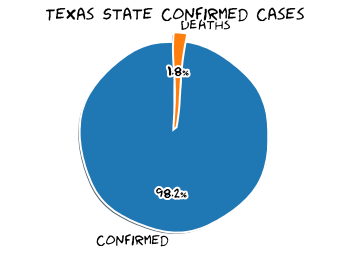

Texas State Total Population
28701845
Texas State Confirmed
1153944 (4.0204523437430595% of population)
Texas State Deaths
21013 (1.8209722482200177% of confirmed)



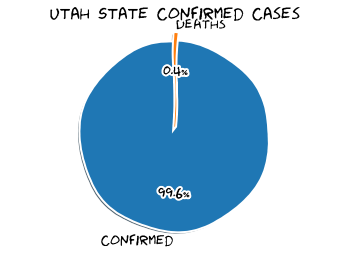

Utah State Total Population
3161105
Utah State Confirmed
177176 (5.60487551030415% of population)
Utah State Deaths
793 (0.4475775500067729% of confirmed)



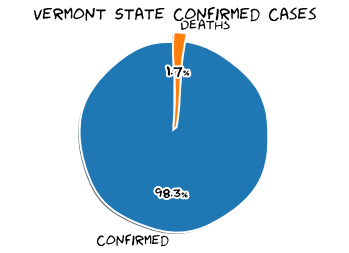

Vermont State Total Population
626299
Vermont State Confirmed
3629 (0.5794357008393755% of population)
Vermont State Deaths
63 (1.7360154312482778% of confirmed)



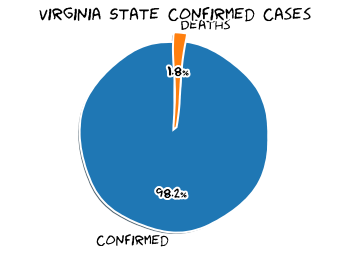

Virginia State Total Population
8517685
Virginia State Confirmed
217796 (2.5569858476804437% of population)
Virginia State Deaths
3938 (1.8081140149497694% of confirmed)



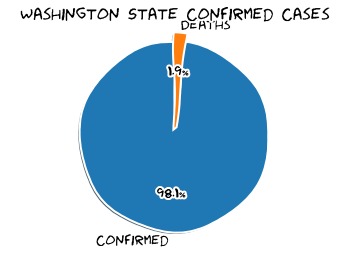

Washington State Total Population
7535591
Washington State Confirmed
141260 (1.8745709526963443% of population)
Washington State Deaths
2619 (1.8540280334135635% of confirmed)



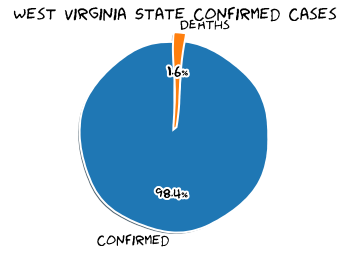

West Virginia State Total Population
1805832
West Virginia State Confirmed
40478 (2.2415152683084583% of population)
West Virginia State Deaths
662 (1.6354562972478879% of confirmed)



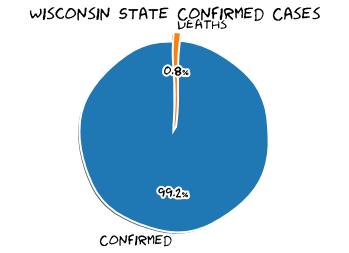

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
376238 (6.4717227011019745% of population)
Wisconsin State Deaths
3150 (0.8372360048692583% of confirmed)



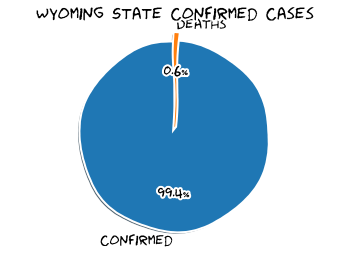

Wyoming State Total Population
577737
Wyoming State Confirmed
28169 (4.875747961442664% of population)
Wyoming State Deaths
176 (0.6248003124001562% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 58795765},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1390343},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-11-23T15:26:28.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 37600772},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidentRate,caseFatalityRatio
0,,,,Afghanistan,2020-11-23 05:25:26,33.93911,67.709953,44706,1687,35934,7085,Afghanistan,114.84178069648537,3.773542701203418
1,,,,Albania,2020-11-23 05:25:26,41.1533,20.1683,32761,699,15842,16220,Albania,1138.4043366460492,2.1336345044412566
2,,,,Algeria,2020-11-23 05:25:26,28.0339,1.6596,74862,2272,48794,23796,Algeria,170.71885838610496,3.034917581683631
3,,,,Andorra,2020-11-23 05:25:26,42.5063,1.5218,6256,76,5358,822,Andorra,8096.809680968096,1.2148337595907928
4,,,,Angola,2020-11-23 05:25:26,-11.2027,17.8739,14493,337,7346,6810,Angola,44.09688377153135,2.325260470572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,,,,West Bank and Gaza,2020-11-23 05:25:26,31.9522,35.2332,71644,636,59021,11987,West Bank and Gaza,1404.394387754302,0.8877226285522863
3970,,,,Western Sahara,2020-11-23 05:25:26,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3971,,,,Yemen,2020-11-23 05:25:26,15.552727,48.516388,2099,608,1448,43,Yemen,7.037491624747938,28.966174368747023
3972,,,,Zambia,2020-11-23 05:25:26,-13.133897,27.849332,17424,357,16701,366,Zambia,94.77829472611879,2.048898071625344


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1606141565000,34.308284,-118.228241,364583,0,7438,357145,Los Angeles,06037,"Los Angeles, California, US",3631.627793,None,None,84006037,USA
1,Illinois,US,1606141565000,41.841448,-87.816588,280896,0,6303,274593,Cook,17031,"Cook, Illinois, US",5454.044506,None,None,84017031,USA
2,Florida,US,1606141565000,25.611236,-80.551706,214943,0,3766,211177,Miami-Dade,12086,"Miami-Dade, Florida, US",7911.216295,None,None,84012086,USA
3,Arizona,US,1606141565000,33.348359,-112.491815,190034,0,3896,186138,Maricopa,04013,"Maricopa, Arizona, US",4236.710368,None,None,84004013,USA
4,Texas,US,1606141565000,29.858649,-95.393395,182192,0,2965,179227,Harris,48201,"Harris, Texas, US",3865.466523,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Maine,US,1606141565000,NaN,NaN,3,0,0,3,Unassigned,90023,"Unassigned, Maine, US",NaN,None,None,84090023,USA
3236,Oregon,US,1606141565000,44.726982,-120.028143,2,0,0,2,Wheeler,41069,"Wheeler, Oregon, US",150.150150,None,None,84041069,USA
3237,Idaho,US,1606141565000,NaN,NaN,1,0,0,1,Unassigned,90016,"Unassigned, Idaho, US",NaN,None,None,84090016,USA
3238,Texas,US,1606141565000,33.616438,-100.255806,1,0,0,1,King,48269,"King, Texas, US",367.647059,None,None,84048269,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1606141565000,40.710881,-73.816847,85777,0,7338,78439,Queens,36081,"Queens, New York, US",3805.785458,None,None,84036081,USA
10,New York,US,1606141565000,40.636182,-73.949356,84609,0,7481,77128,Kings,36047,"Kings, New York, US",3305.164297,None,None,84036047,USA
20,New York,US,1606141565000,40.852093,-73.862828,60979,0,5033,55946,Bronx,36005,"Bronx, New York, US",4299.724934,None,None,84036005,USA
24,New York,US,1606141565000,40.740665,-73.589419,56706,0,2240,54466,Nassau,36059,"Nassau, New York, US",4179.010763,None,None,84036059,USA
25,New York,US,1606141565000,40.883201,-72.801217,56339,0,2032,54307,Suffolk,36103,"Suffolk, New York, US",3815.451838,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,New York,US,1606141565000,42.780810,-76.824971,243,0,5,238,Seneca,36099,"Seneca, New York, US",714.369708,None,None,84036099,USA
2735,New York,US,1606141565000,44.590409,-74.299260,231,0,5,226,Franklin,36033,"Franklin, New York, US",461.796809,None,None,84036033,USA
2743,New York,US,1606141565000,42.635055,-77.103699,228,0,7,221,Yates,36123,"Yates, New York, US",915.184843,None,None,84036123,USA
2885,New York,US,1606141565000,42.588317,-74.443390,169,0,2,167,Schoharie,36095,"Schoharie, New York, US",545.178877,None,None,84036095,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

598118

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
23,None,Philippines,1606141565000,12.879721,121.774017,420614,386604,8173,25837.0,None,None,Philippines,383.838141,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
